In [103]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from salishsea_tools import viz_tools
import cmocean as cm

### Import data

In [104]:
abort = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/26feb23/output.abort.nc')
feb25_GridU = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_U.nc')
feb25_GridV = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_V.nc')
feb25_GridT = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_T.nc')
feb25_restart = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_00034560_restart.nc')

xIdxAb = 226 -1     #fortran indexing starts at 1
yIdxAb = 374 -1     #fortran indexing starts at 1

abort

<xarray.Dataset>
Dimensions:       (y: 826, x: 710, deptht: 39, time_counter: 1)
Coordinates:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
  * deptht        (deptht) float32 0.5 1.5 2.5 3.5 ... 333.8 360.7 387.6 414.5
  * time_counter  (time_counter) datetime64[ns] 2023-02-26T00:00:19
Dimensions without coordinates: y, x
Data variables: (12/14)
    vosaline      (time_counter, deptht, y, x) float32 ...
    votemper      (time_counter, deptht, y, x) float32 ...
    sossheig      (time_counter, y, x) float32 ...
    vozocrtx      (time_counter, deptht, y, x) float32 ...
    vomecrty      (time_counter, deptht, y, x) float32 ...
    vovecrtz      (time_counter, deptht, y, x) float32 ...
    ...            ...
    soshfldo      (time_counter, y, x) float32 ...
    soicecov      (time_counter, y, x) float32 ...
    sozotaux      (time_counter, y, x) float32 ...
    sometauy      (time_counter, y, x) float32 ...
    vovvldep      (time_counter, deptht, y, x) float32 ...
    vovvle3t      (time_counter, deptht, y, x) float32 ...
Attributes:
    Conventions:  CF-1.1
    production:   An IPSL model
    TimeStamp:    12/11/2024 15:19:54 -0800
    file_name:    output.abort.nc

In [105]:
# Import mesh data
mesh = xr.open_dataset('/ocean/mdunphy/SSS150/grid/mesh_mask_southsalishsea150_update202108210102AUM1.nc')
tmask = 1 - mesh.tmask[0]
umask = 1 - mesh.umask[0]

Text(0.5, 1.0, 'u-velocity')

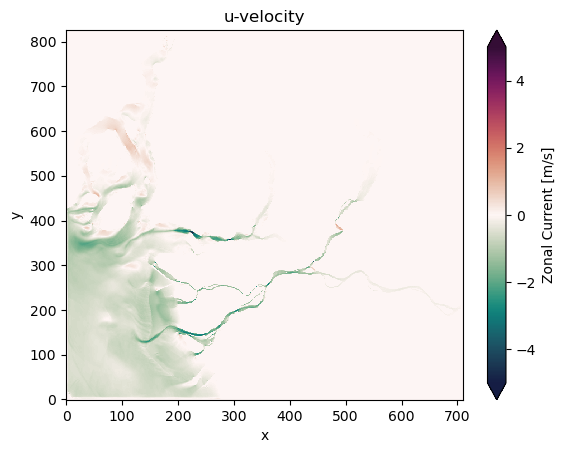

In [106]:
abort['vozocrtx'][0,0].plot(cmap=cm.cm.curl,vmin=-5,vmax=5)
# plt.ylim(300,400)
# plt.xlim(110,280)
plt.title('u-velocity')

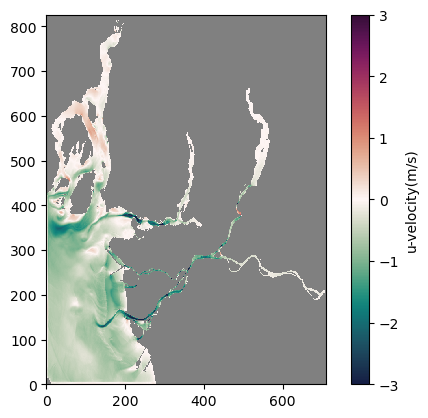

In [107]:
masked_uvel = np.ma.masked_array(abort.vozocrtx[0, 0], mask=umask[0])

cmap = cm.cm.curl
cmap.set_bad('grey')

fig, ax = plt.subplots(1, 1)

pm = ax.pcolormesh(masked_uvel,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
# ax.set_xlim(100,450)
# ax.set_ylim(300,500)

(110.0, 280.0)

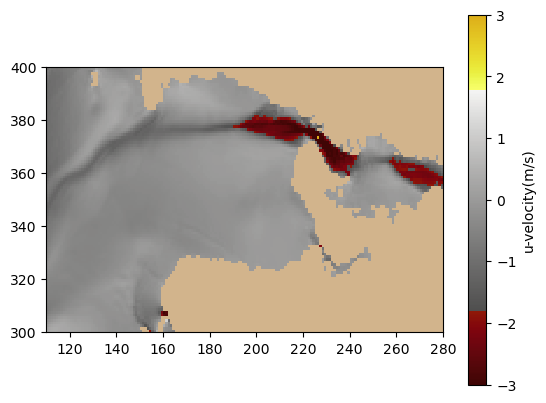

In [108]:
fig, ax = plt.subplots(1, 1)

cmap = cm.cm.oxy
cmap.set_bad('tan')

pm = ax.pcolormesh(masked_uvel,vmin=-3,vmax=3,cmap=cm.cm.oxy)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
plt.ylim(300,400)
plt.xlim(110,280)

(180.0, 260.0)

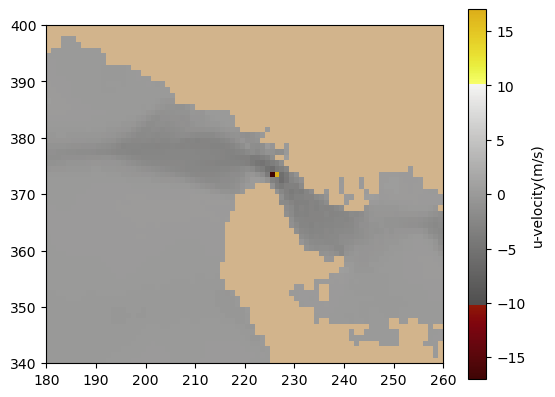

In [109]:
fig, ax = plt.subplots(1, 1)

cmap = cm.cm.oxy
cmap.set_bad('tan')

pm = ax.pcolormesh(masked_uvel,vmin=-17,vmax=17,cmap=cm.cm.oxy)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
plt.ylim(340,400)
plt.xlim(180,260)

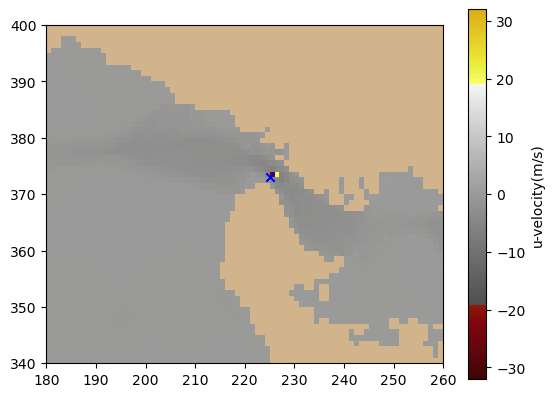

In [110]:
fig, ax = plt.subplots(1, 1)

cmap = cm.cm.oxy
cmap.set_bad('tan')

pm = ax.pcolormesh(masked_uvel,vmin=-32,vmax=32,cmap=cm.cm.oxy)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
plt.ylim(340,400)
plt.xlim(180,260)

plt.scatter(xIdxAb,yIdxAb,marker='x',color='blue')

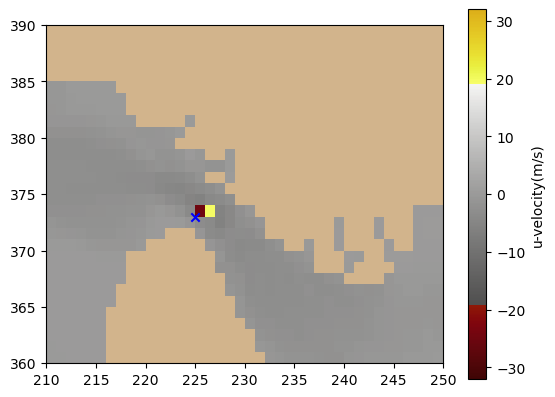

In [111]:
fig, ax = plt.subplots(1, 1)

cmap = cm.cm.oxy
cmap.set_bad('tan')

pm = ax.pcolormesh(masked_uvel,vmin=-32,vmax=32,cmap=cm.cm.oxy)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
plt.ylim(360,390)
plt.xlim(210,250)

plt.scatter(xIdxAb,yIdxAb,marker='x',color='blue')

(180.0, 260.0)

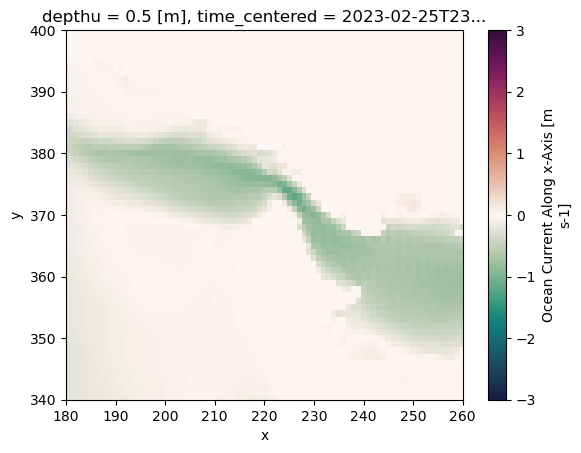

In [112]:
feb25_GridU['vozocrtx'][23,0].plot(cmap=cm.cm.curl,vmin=-3,vmax=3)
plt.ylim(340,400)
plt.xlim(180,260)

Text(0.5, 1.0, "['2023-02-26T00:00:19.000000000']")

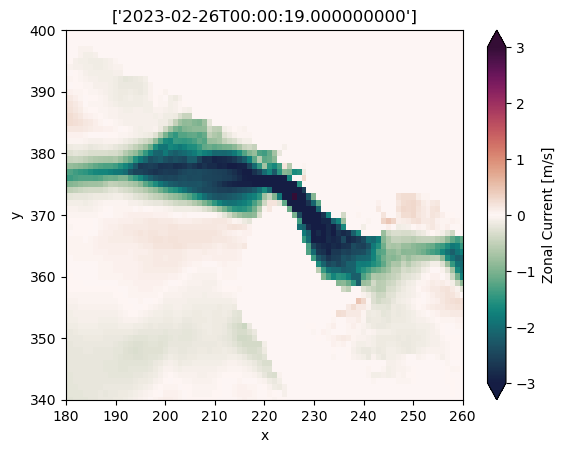

In [113]:
abort['vozocrtx'][0,0].plot(cmap=cm.cm.curl,vmin=-3,vmax=3)
plt.ylim(340,400)
plt.xlim(180,260)
plt.title(abort['vozocrtx'].time_counter.values)

Text(0.5, 1.0, "['2023-02-26T00:00:19.000000000']")

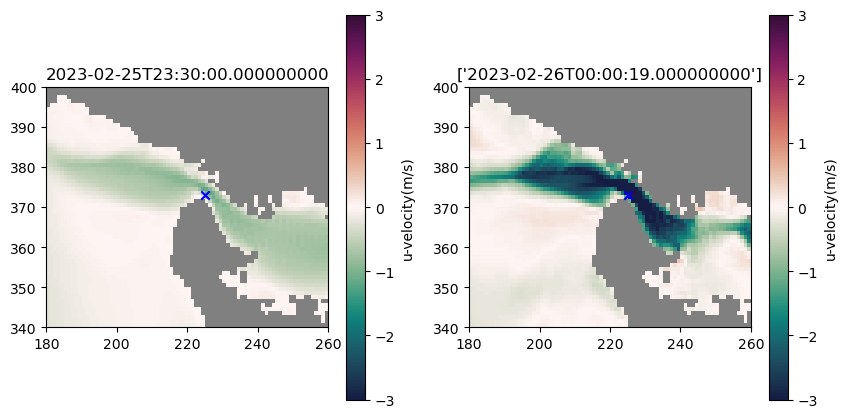

In [114]:
maskedUvel_feb25 = np.ma.masked_array(feb25_GridU.vozocrtx[23, 0], mask=umask[0])

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

cmap = cm.cm.curl
cmap.set_bad('grey')

pm = ax1.pcolormesh(maskedUvel_feb25,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
ax1.set_ylim(340,400)
ax1.set_xlim(180,260)
ax1.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax1.set_title(feb25_GridU['vozocrtx'].time_counter.values[23])

pm = ax2.pcolormesh(masked_uvel,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
ax2.set_ylim(340,400)
ax2.set_xlim(180,260)
ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title(abort['vozocrtx'].time_counter.values)

Text(0.5, 1.0, "['2023-02-26T00:00:19.000000000']")

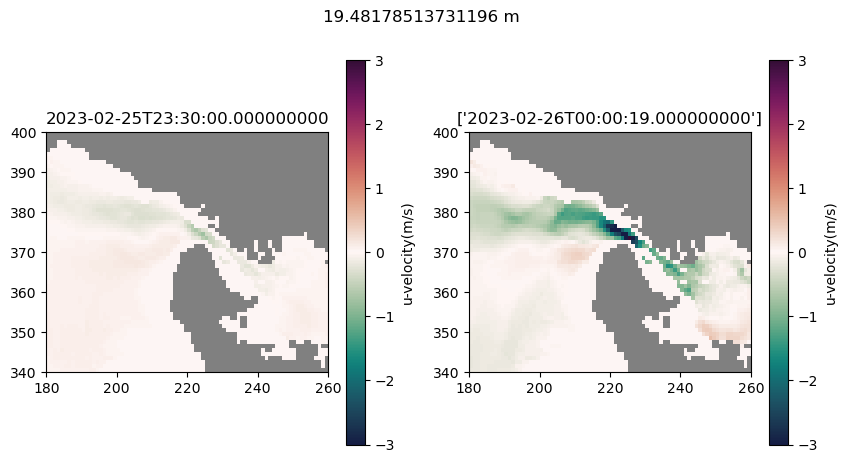

In [115]:
maskedUvel_feb25 = np.ma.masked_array(feb25_GridU.vozocrtx[23, 18], mask=umask[0])
masked_uvel = np.ma.masked_array(abort.vozocrtx[0, 18], mask=umask[0])

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

cmap = cm.cm.curl
cmap.set_bad('grey')

pm = ax1.pcolormesh(maskedUvel_feb25,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
ax1.set_ylim(340,400)
ax1.set_xlim(180,260)
# ax1.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax1.set_title(feb25_GridU['vozocrtx'].time_counter.values[23])
fig.suptitle(f'{mesh.gdept_1d[0,18].values} m')

pm = ax2.pcolormesh(masked_uvel,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
ax2.set_ylim(340,400)
ax2.set_xlim(180,260)
# ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title(abort['vozocrtx'].time_counter.values)

Text(0.5, 0.98, 'u-velocity with depth')

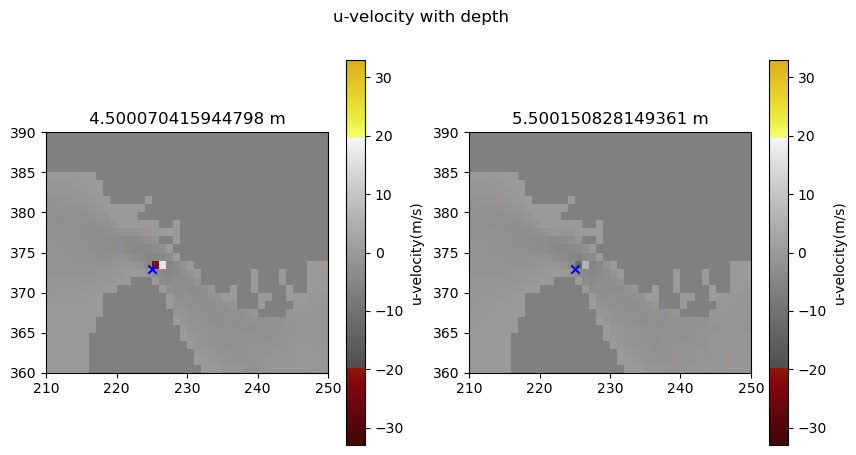

In [116]:
fig,[ax2,ax3] = plt.subplots(1,2,figsize=(10,5))

masked_uvel = np.ma.masked_array(abort.vozocrtx[0, 4], mask=umask[0])

cmap = cm.cm.oxy
cmap.set_bad('grey')

pm = ax2.pcolormesh(masked_uvel,vmin=-33,vmax=33,cmap=cmap)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
ax2.set_ylim(360,390)
ax2.set_xlim(210,250)
ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title(f'{mesh.gdept_1d[0,4].values} m')

masked_uvel = np.ma.masked_array(abort.vozocrtx[0, 5], mask=umask[0])

pm = ax3.pcolormesh(masked_uvel,vmin=-33,vmax=33,cmap=cmap)
viz_tools.set_aspect(ax3);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
ax3.set_ylim(360,390)
ax3.set_xlim(210,250)
ax3.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax3.set_title(f'{mesh.gdept_1d[0,5].values} m')

fig.suptitle('u-velocity with depth')

### Look at v-velocity

Text(0.5, 1.0, 'v-velocity')

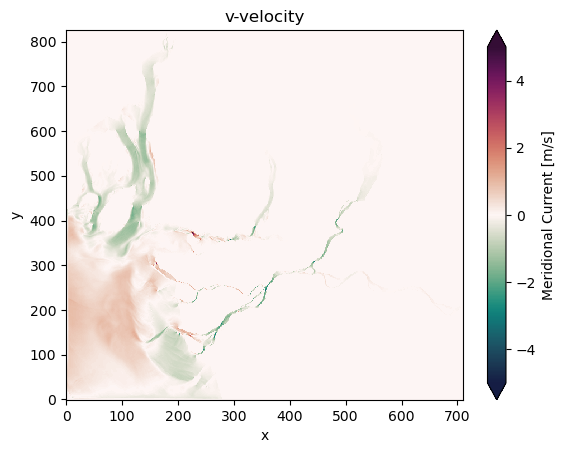

In [117]:
abort['vomecrty'][0,0].plot(cmap=cm.cm.curl,vmin=-5,vmax=5)
plt.title('v-velocity')

In [118]:
masked_vvel = np.ma.masked_array(abort.vomecrty[0, 0], mask=umask[0])

Text(0.5, 1.0, 'v-velocity')

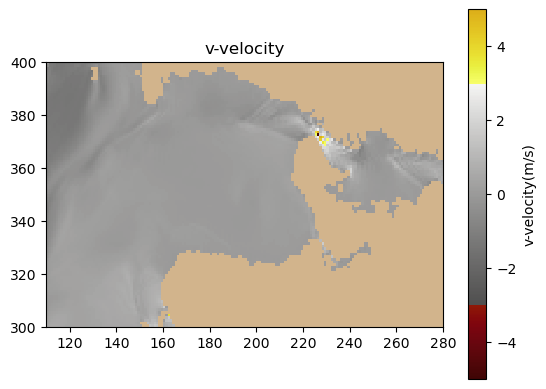

In [119]:
fig, ax = plt.subplots(1, 1)

cmap = cm.cm.oxy
cmap.set_bad('tan')

pm = ax.pcolormesh(masked_vvel,vmin=-5,vmax=5,cmap=cm.cm.oxy)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('v-velocity(m/s)')
plt.ylim(300,400)
plt.xlim(110,280)
plt.title('v-velocity')

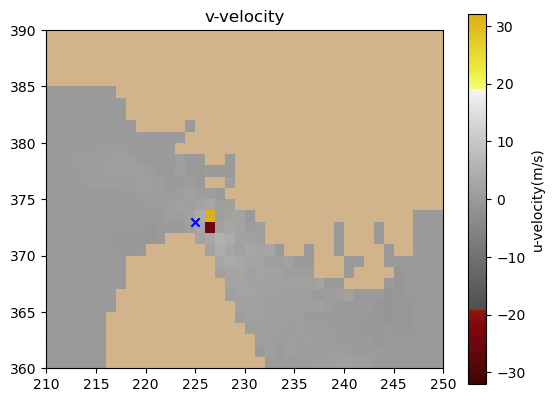

In [120]:
fig, ax = plt.subplots(1, 1)

cmap = cm.cm.oxy
cmap.set_bad('tan')

pm = ax.pcolormesh(masked_vvel,vmin=-32,vmax=32,cmap=cm.cm.oxy)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
plt.ylim(360,390)
plt.xlim(210,250)
plt.title('v-velocity')

plt.scatter(xIdxAb,yIdxAb,marker='x',color='blue')

Text(0.5, 1.0, "['2023-02-26T00:00:19.000000000']")

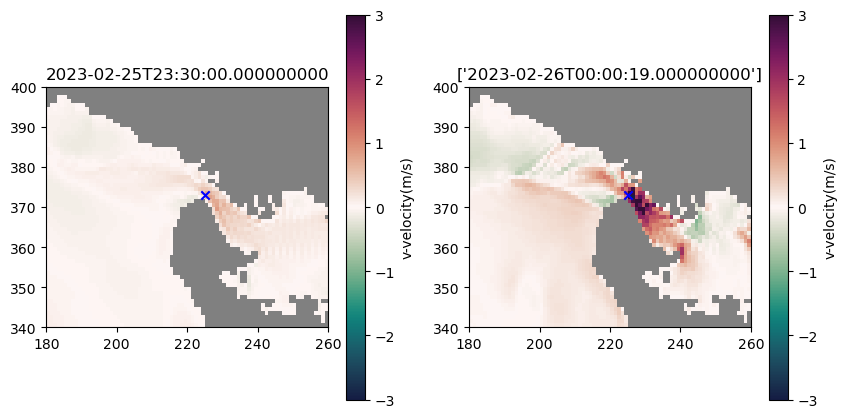

In [121]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

maskedVvel_feb25 = np.ma.masked_array(feb25_GridV.vomecrty[23, 0], mask=umask[0])
masked_vvel = np.ma.masked_array(abort.vomecrty[0, 0], mask=umask[0])

cmap = cm.cm.curl
cmap.set_bad('grey')

pm = ax1.pcolormesh(maskedVvel_feb25,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('v-velocity(m/s)')
ax1.set_ylim(340,400)
ax1.set_xlim(180,260)
ax1.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax1.set_title(feb25_GridV['vomecrty'].time_counter.values[23])

pm = ax2.pcolormesh(masked_vvel,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('v-velocity(m/s)')
ax2.set_ylim(340,400)
ax2.set_xlim(180,260)
ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title(abort['vomecrty'].time_counter.values)


Text(0.5, 0.98, '19.48178513731196 m')

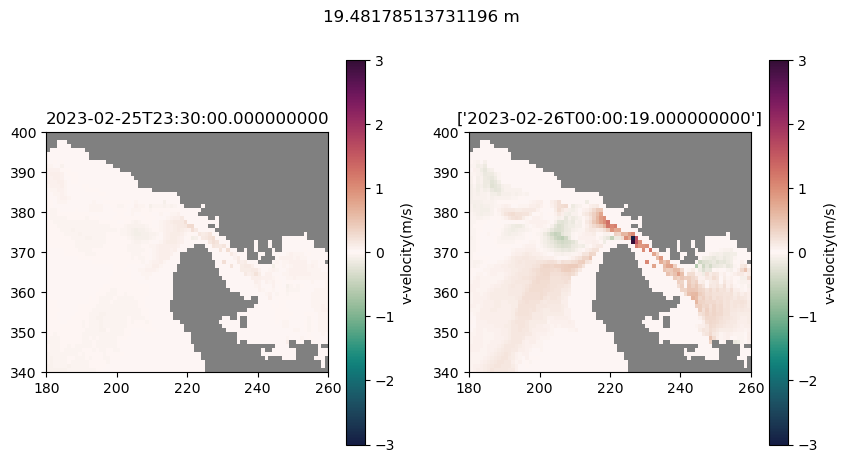

In [122]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

maskedVvel_feb25 = np.ma.masked_array(feb25_GridV.vomecrty[23, 18], mask=umask[0])
masked_vvel = np.ma.masked_array(abort.vomecrty[0, 18], mask=umask[0])

cmap = cm.cm.curl
cmap.set_bad('grey')

pm = ax1.pcolormesh(maskedVvel_feb25,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('v-velocity(m/s)')
ax1.set_ylim(340,400)
ax1.set_xlim(180,260)
# ax1.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax1.set_title(feb25_GridV['vomecrty'].time_counter.values[23])

pm = ax2.pcolormesh(masked_vvel,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('v-velocity(m/s)')
ax2.set_ylim(340,400)
ax2.set_xlim(180,260)
# ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title(abort['vomecrty'].time_counter.values)

fig.suptitle(f'{mesh.gdept_1d[0,18].values} m')

Text(0.5, 0.98, 'v-velocity wth depth')

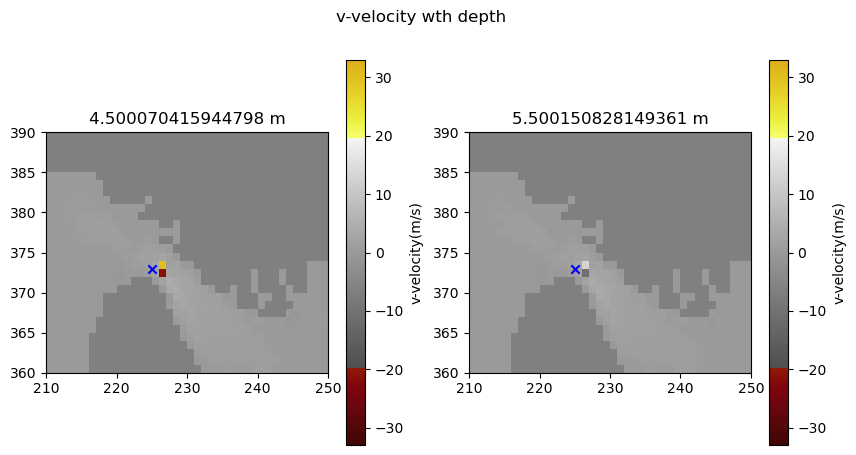

In [123]:
fig,[ax2,ax3] = plt.subplots(1,2,figsize=(10,5))

masked_vvel = np.ma.masked_array(abort.vomecrty[0, 4], mask=umask[0])

cmap = cm.cm.oxy
cmap.set_bad('grey')

pm = ax2.pcolormesh(masked_vvel,vmin=-33,vmax=33,cmap=cmap)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('v-velocity(m/s)')
ax2.set_ylim(360,390)
ax2.set_xlim(210,250)
ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title(f'{mesh.gdept_1d[0,4].values} m')

masked_vvel = np.ma.masked_array(abort.vomecrty[0, 5], mask=umask[0])

pm = ax3.pcolormesh(masked_vvel,vmin=-33,vmax=33,cmap=cmap)
viz_tools.set_aspect(ax3);
cb = fig.colorbar(pm)
cb.set_label('v-velocity(m/s)')
ax3.set_ylim(360,390)
ax3.set_xlim(210,250)
ax3.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax3.set_title(f'{mesh.gdept_1d[0,5].values} m')

fig.suptitle('v-velocity wth depth')

### Look at w-velocity

In [124]:
abort.vovecrtz

<xarray.DataArray 'vovecrtz' (time_counter: 1, deptht: 39, y: 826, x: 710)>
[22871940 values with dtype=float32]
Coordinates:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
  * deptht        (deptht) float32 0.5 1.5 2.5 3.5 ... 333.8 360.7 387.6 414.5
  * time_counter  (time_counter) datetime64[ns] 2023-02-26T00:00:19
Dimensions without coordinates: y, x
Attributes:
    units:               m/s
    standard_name:       Vertical Velocity
    long_name:           Vertical Velocity
    online_operation:    inst(x)
    interval_operation:  20.0
    interval_write:      20.0

Text(0.5, 1.0, 'w-velocity')

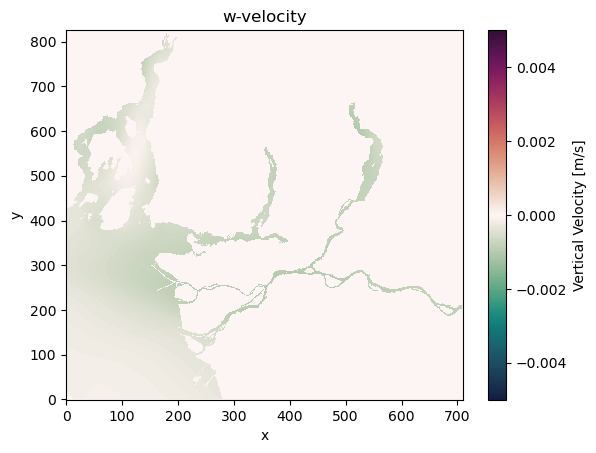

In [125]:
abort['vovecrtz'][0,0].plot(cmap=cm.cm.curl,vmin=-0.005,vmax=0.005)
plt.title('w-velocity')

Not a problem with w-velocity

### Look at salinity

Text(0.5, 0.98, 'surface salinity')

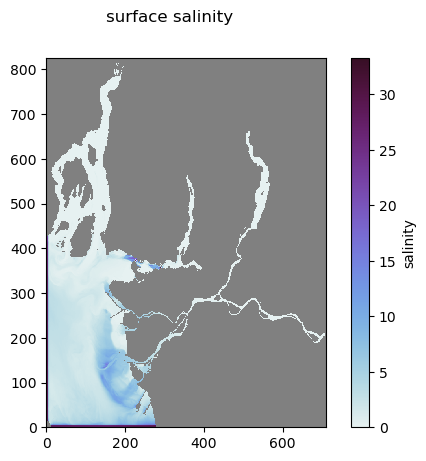

In [126]:
masked_sal = np.ma.masked_array(abort.vosaline[0, 0], mask=umask[0])

cmap = cm.cm.dense
cmap.set_bad('grey')

fig, ax = plt.subplots(1, 1)

pm = ax.pcolormesh(masked_sal,cmap=cmap)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('salinity')
fig.suptitle('surface salinity')

Text(0.5, 0.98, 'Surface salinity')

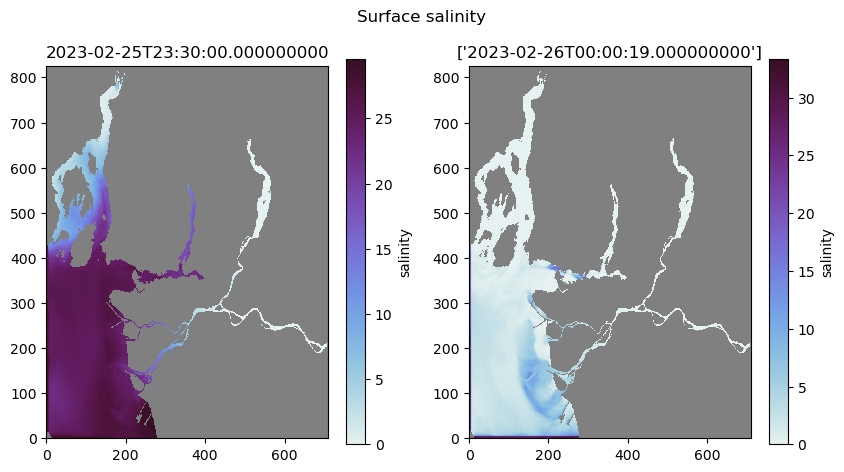

In [127]:
maskedSal_feb25 = np.ma.masked_array(feb25_GridT.vosaline[23, 0], mask=umask[0])

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

cmap = cm.cm.dense
cmap.set_bad('grey')

pm = ax1.pcolormesh(maskedSal_feb25,cmap=cmap)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('salinity')
# ax1.set_ylim(340,400)
# ax1.set_xlim(180,260)
# ax1.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax1.set_title(feb25_GridT['vosaline'].time_counter.values[23])

pm = ax2.pcolormesh(masked_sal,cmap=cmap)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('salinity')
# ax2.set_ylim(340,400)
# ax2.set_xlim(180,260)
# ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title(abort['vosaline'].time_counter.values)

fig.suptitle('Surface salinity')

Text(0.5, 0.98, '25 m depth')

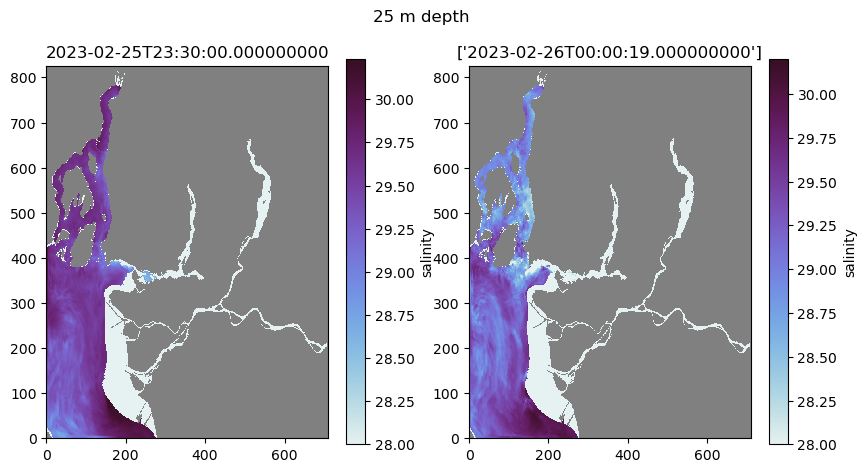

In [128]:
masked_sal = np.ma.masked_array(abort.vosaline[0, 20], mask=umask[0])
maskedSal_feb25 = np.ma.masked_array(feb25_GridT.vosaline[23, 20], mask=umask[0])

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

cmap = cm.cm.dense
cmap.set_bad('grey')

pm = ax1.pcolormesh(maskedSal_feb25,cmap=cmap,vmin=28)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('salinity')
# ax1.set_ylim(340,400)
# ax1.set_xlim(180,260)
# ax1.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax1.set_title(feb25_GridT['vosaline'].time_counter.values[23])

pm = ax2.pcolormesh(masked_sal,cmap=cmap,vmin=28)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('salinity')
# ax2.set_ylim(340,400)
# ax2.set_xlim(180,260)
# ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title(abort['vosaline'].time_counter.values)

fig.suptitle('25 m depth')

Text(0.5, 0.98, '200 m depth')

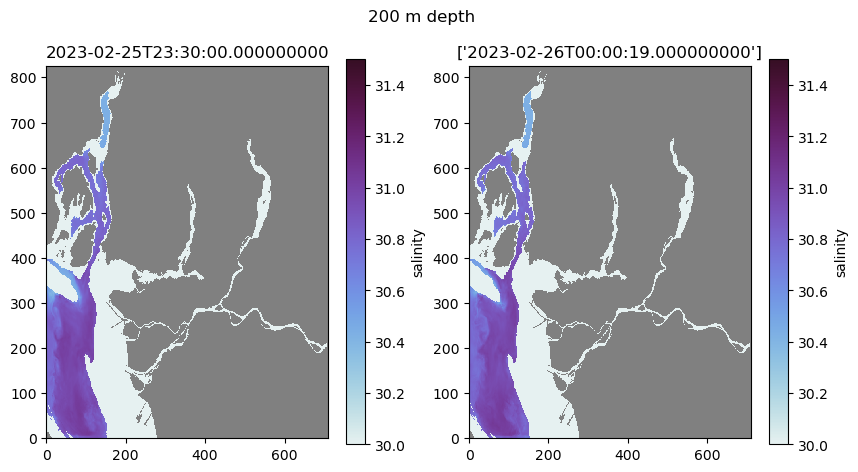

In [129]:
masked_sal = np.ma.masked_array(abort.vosaline[0, 30], mask=umask[0])
maskedSal_feb25 = np.ma.masked_array(feb25_GridT.vosaline[23, 30], mask=umask[0])

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

cmap = cm.cm.dense
cmap.set_bad('grey')

pm = ax1.pcolormesh(maskedSal_feb25,cmap=cmap,vmin=30,vmax=31.5)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('salinity')
# ax1.set_ylim(340,400)
# ax1.set_xlim(180,260)
# ax1.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax1.set_title(feb25_GridT['vosaline'].time_counter.values[23])

pm = ax2.pcolormesh(masked_sal,cmap=cmap,vmin=30,vmax=31.5)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('salinity')
# ax2.set_ylim(340,400)
# ax2.set_xlim(180,260)
# ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title(abort['vosaline'].time_counter.values)

fig.suptitle('200 m depth')

In [130]:
mesh.gdept_1d[0,15].values

array(15.63428737)

### Look at temperature

Text(0.5, 0.98, 'Surface temperature')

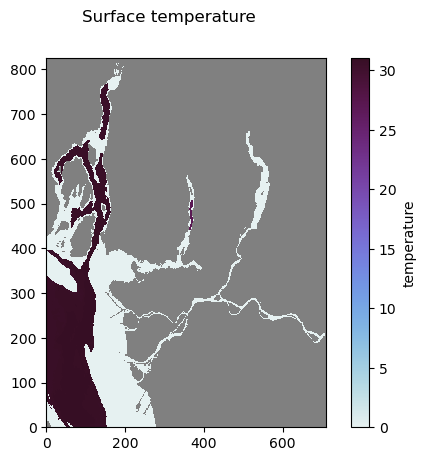

In [131]:
masked_temp = np.ma.masked_array(abort.votemper[0, 0], mask=tmask[0])

cmap = cm.cm.dense
cmap.set_bad('grey')

fig, ax = plt.subplots(1, 1)

pm = ax.pcolormesh(masked_sal,cmap=cmap)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('temperature')
fig.suptitle('Surface temperature')

Text(0.5, 0.98, 'Surface temperature')

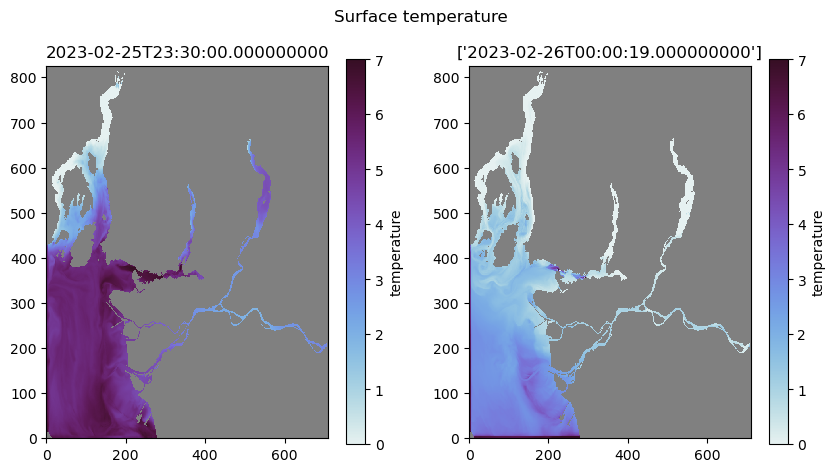

In [132]:
maskedTemp_feb25 = np.ma.masked_array(feb25_GridT.votemper[23, 0], mask=umask[0])

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

cmap = cm.cm.dense
cmap.set_bad('grey')

pm = ax1.pcolormesh(maskedTemp_feb25,cmap=cmap,vmin=0,vmax=7)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('temperature')
# ax1.set_ylim(340,400)
# ax1.set_xlim(180,260)
# ax1.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax1.set_title(feb25_GridT['vosaline'].time_counter.values[23])

pm = ax2.pcolormesh(masked_temp,cmap=cmap,vmin=0,vmax=7)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('temperature')
# ax2.set_ylim(340,400)
# ax2.set_xlim(180,260)
# ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title(abort['vosaline'].time_counter.values)
fig.suptitle('Surface temperature')

In [133]:
abort

<xarray.Dataset>
Dimensions:       (y: 826, x: 710, deptht: 39, time_counter: 1)
Coordinates:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
  * deptht        (deptht) float32 0.5 1.5 2.5 3.5 ... 333.8 360.7 387.6 414.5
  * time_counter  (time_counter) datetime64[ns] 2023-02-26T00:00:19
Dimensions without coordinates: y, x
Data variables: (12/14)
    vosaline      (time_counter, deptht, y, x) float32 ...
    votemper      (time_counter, deptht, y, x) float32 ...
    sossheig      (time_counter, y, x) float32 ...
    vozocrtx      (time_counter, deptht, y, x) float32 ...
    vomecrty      (time_counter, deptht, y, x) float32 ...
    vovecrtz      (time_counter, deptht, y, x) float32 ...
    ...            ...
    soshfldo      (time_counter, y, x) float32 ...
    soicecov      (time_counter, y, x) float32 ...
    sozotaux      (time_counter, y, x) float32 ...
    sometauy      (time_counter, y, x) float32 ...
    vovvldep      (time_counter, deptht, y, x) float32 ...
    vovvle3t      (time_counter, deptht, y, x) float32 ...
Attributes:
    Conventions:  CF-1.1
    production:   An IPSL model
    TimeStamp:    12/11/2024 15:19:54 -0800
    file_name:    output.abort.nc

### Time of failure

Time step start: 34560

Time step failure (from time.step): 36398

Time steps in 1 day: 4320

In [134]:
36398 - 34560


1838

In [135]:
180*10

1800

But theres only 1 time step in abort?